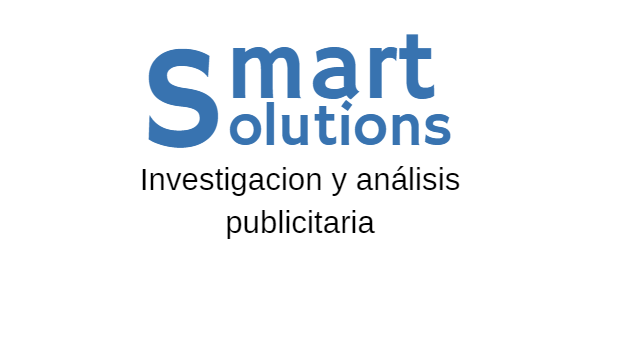

**AdSmart Solutions**

AdSmart Solutions es una empresa dedicada a la elaboración de campañas pblicitarias dentro de Aplicaciones móviles, el objetivo de esta investigación es obtener datos relevantes acerca de las distintas aplicaciones que se encuentran en la Play Store. Con estos datos conseguiremos saber en que desarrollador o en que tipo de aplicaciones es mejor invertir en publicidad para obtener los mejores resultados posibles. En este caso tenemos que elaborar una campañas de publicidad dedicada especialmente a públicos objetivos que tengan aplicaciones de productividad o que esten interesados en la productividad. Algunas de las preguntas que nos planteamos son las siguientes:


1.   **¿Cual es el desarrollador con más descargas y soporte de anuncio?**
2.   **¿Es la productividad una de las categorías más descargada?**
3.   **¿Que aplicaciones tiene el desarrollador con más descargas?**
4.   **¿Las applicaciones con mejor valoración son más descargadas?**
5.   **¿Que desarrollador es más rentable a futuro para invertir en pubicidad?**








**Aprod**

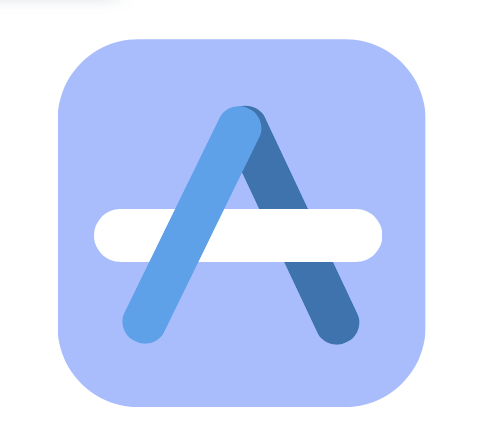

**A prod - Tu compañero en la productividad**

A prod es la herramienta definitiva para optimizar tu tiempo y maximizar tu eficiencia. Diseñada con un enfoque en la simplicidad y el rendimiento, A prod te ayuda a organizar tus tareas, gestionar proyectos y cumplir con tus objetivos diarios de manera efectiva.

Con una interfaz intuitiva y moderna, A prod te permite:

Crear listas de tareas personalizables.
Establecer recordatorios y plazos para nunca olvidar lo importante.
Dividir grandes proyectos en pasos manejables.
Monitorear tu progreso con gráficos sencillos y claros.
Ideal tanto para profesionales como para estudiantes, A prod convierte tus metas en logros. Ya sea que trabajes solo o en equipo, esta app está diseñada para ajustarse a tu estilo de trabajo, ayudándote a mantener el foco y cumplir con todas tus responsabilidades.

In [2]:
#Importamos las bibliotecas necesarias para realizar la investigación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Leemos el archivo que tenemos que abrir
df = pd.read_csv("https://drive.google.com/file/d/1XX1NKxgOQr4P_92e1YVHeqbvzMpyt6dq/view?usp=sharing", on_bad_lines='skip')  # Skip problematic lines

#Mostramos la informacion del archivo para ver las entradas, las columnas o el tipo de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Una vez imporado el archivo el cual utilizaremos para realizar la investigación tenemos que asegurarnos que no tenga valores nulos.

In [ ]:
#Sumamos los datos nulos para ver el total de estos
df.isnull().sum()

,0
App Name,13
App Id,0
Category,13
Rating,2812
Rating Count,118768
Installs,91
Minimum Installs,13
Free,92
Price,92
Currency,92


## Limpieza de datos

En la etapa de limpieza de datos nos tenemos que asegurar que si el documento que vamos a utilizar tienen datos nulos, quitarlos, rellenarlos y filtrarlos para evitar complicaciones al realizar la investigación.
La limpieza de datos es una fase fundamental que se reliza al principio de la investigación para evitar complicaciones posteriores y es obligatorio realizarlo con cada nueva base de datos que importamos.

**Verificar valores faltantes y ponerlos como porcentaje**

In [ ]:
valores_faltantes= df.isnull().sum()
#Podemos visualizar los datos en forma de porcentajes para ver cuanto porcentaje de valores nulos hay en cada columna
valores_fatantes_porcentaje= (valores_faltantes/len(df))*100
valores_fatantes_porcentaje

,0
App Name,0.002884
App Id,0.000000
Category,0.002884
Rating,0.000000
Rating Count,0.000000
Installs,0.020187
Minimum Installs,0.000000
Free,0.020408
Price,0.000000
Currency,0.020408


A la hora de eliminar valores nulos y posteriormente rellenarlos con un valor, separamos los datos tipo numéricos de los datos tipo objeto ya que estos tienen letras a parte de números y los sustituiremos con una palabra, al contrario de los datos tipo numéricos que los sustituiremos con el número 0.

In [ ]:
#Borramos los tipos de datos que sean categoricamente numéricos
columnas_numericas = df.select_dtypes(include=['number']).columns
df[columnas_numericas] = df[columnas_numericas].dropna()
#Los rellenamos con el valor 0
df[columnas_numericas] = df[columnas_numericas].fillna(0)
df.isnull().sum()

,0
App Name,13
App Id,0
Category,13
Rating,0
Rating Count,0
Installs,91
Minimum Installs,0
Free,92
Price,0
Currency,92


Esto dependera si hay celdas con texto para en vez de poner 0 poner una palabra

In [ ]:
#Selecciona las columnas de tipo texto
columnas_texto = df.select_dtypes(include=['object']).columns

#Rellena los valores faltantes con 'Desconocido'
df[columnas_texto] = df[columnas_texto].fillna('Desconocido')

#Verifica si quedan valores nulos
df.isnull().sum()


,0
App Name,0
App Id,0
Category,0
Rating,2812
Rating Count,118768
Installs,0
Minimum Installs,13
Free,0
Price,92
Currency,0


Comprobamos con una columna de la base de datos que efectivamente se ha cambiado

In [ ]:
#tail muestra la ultimas entradas de la columna
df["Developer Address"].tail(30)

,Developer Address
450763,Desconocido
450764,Desconocido
450765,Desconocido
450766,Desconocido
450767,Desconocido
450768,"5th floor, Cyberview towers\nVittal rao nagar,..."
450769,"Akhalkalaki,Samtskhe-Javakheti"
450770,"Akhalkalaki,Samtskhe-Javakheti"
450771,"Akhalkalaki,Samtskhe-Javakheti"
450772,"Level 36 North, Menara TM,\nJalan Pantai Bahar..."


## Transformación de datos

En esta fase de transformación de datos realizaremos distintas búsquedas y agrupaciones para obtener información útil para la empresa, además de eliminar columnas que no utilizaremos con el objetivo de mejorar la usabilidad de la base de datos.

**Eliminación de columnas que no se utilizarán**

En este caso eliminaremos las columnas "Anroid version Text" y "Version".

Eliminación de la columna versión de Android

In [ ]:
#Eliminamos la columna "Android version Text"
df.drop('Android version Text', axis=1, inplace=True)
#Comprobamos que se ha eiminado correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450793 entries, 0 to 450792
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App Name               450793 non-null  object 
 1   App Id                 450793 non-null  object 
 2   Category               450793 non-null  object 
 3   Rating                 450793 non-null  float64
 4   Rating Count           450793 non-null  float64
 5   Installs               450702 non-null  float64
 6   Minimum Installs       450793 non-null  float64
 7   Free                   450793 non-null  object 
 8   Price                  450793 non-null  float64
 9   Currency               450793 non-null  object 
 10  Size                   450793 non-null  object 
 11  Minimum Android        450793 non-null  object 
 12  Developer Id           450793 non-null  object 
 13  Developer Website      450793 non-null  object 
 14  Developer Email        450793 non-nu

Eliminación de la columna versión

In [ ]:
#Eliminamos la columna "Version"
df.drop('Version', axis=1, inplace=True)
#Comprobamos que se ha eliminado corectamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450793 entries, 0 to 450792
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App Name               450793 non-null  object 
 1   App Id                 450793 non-null  object 
 2   Category               450793 non-null  object 
 3   Rating                 450793 non-null  float64
 4   Rating Count           450793 non-null  float64
 5   Installs               450702 non-null  float64
 6   Minimum Installs       450793 non-null  float64
 7   Free                   450793 non-null  object 
 8   Price                  450793 non-null  float64
 9   Currency               450793 non-null  object 
 10  Size                   450793 non-null  object 
 11  Minimum Android        450793 non-null  object 
 12  Developer Id           450793 non-null  object 
 13  Developer Website      450793 non-null  object 
 14  Developer Email        450793 non-nu

**Agrupaciones de columnas**

En la fase de agrupación de columnas vamos a poder obtener datos útiles que seran necesarios para nuestra investigación y que incluso podemos convertirlo en gráficas.

Agrupación por soporte de anuncios, compañias y descargas

In [ ]:
#Creamos la variable de agrupación
agrupado_por_tipo = df.groupby(['Ad Supported',"Developer"])['Installs'].sum().nlargest(10)
agrupado_por_tipo

Ad Supported  Developer                     
Desconocido   Google LLC                        6.499732e+10
True          Google LLC                        2.253300e+10
Desconocido   Samsung Electronics Co.,  Ltd.    1.518114e+10
True          Facebook                          1.101010e+10
Desconocido   Facebook                          1.063520e+10
              WhatsApp LLC                      1.020000e+10
              Microsoft Corporation             5.021586e+09
              ANT+                              4.002800e+09
True          Outfit7 Limited                   2.570000e+09
Desconocido   Huawei Internet Services          2.200000e+09
Name: Installs, dtype: float64

In [ ]:
meta_app=df.loc[df['App Name'] == "Instagram"]
meta_app

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
309402,Instagram,com.instagram.android,Social,3.822520,120260139.0,"1,000,000,000+",1.000000e+09,True,0.0,USD,...,True,True,True,"Create & share photos, stories, & clips with t...",39981650.0,Varies with device,Instagram,"Facebook, Inc.\n1601 Willow Rd\nMenlo Park, CA...",4.809448e+18,Varies with device
426212,Instagram,com.instagram.android,Social,3.822765,120270877.0,"1,000,000,000+",1.000000e+09,True,0.0,USD,...,True,True,True,"Create & share photos, stories, & clips with t...",39985223.0,Varies with device,Instagram,"Facebook, Inc.\n1601 Willow Rd\nMenlo Park, CA...",4.809448e+18,Varies with device


**Agrupacion por Categoría y número de instalados**

Con esta agrupación conseguimos obtener las descargas totales por categoría, aunque antes de realizar esta agrupación, normalizamos los datos de descargas ya que pasamos la columna de descargas a string para que no nos de errores al agruparlo posteriormente.

In [ ]:
#Reemplazamos los valores "," y "+"
df['Installs'] = df['Installs'].astype(str).str.replace(',', '', regex=False).str.replace('+', '', regex=False)
#Lo transformamos en string
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
#Realizamos la agrupación entre categorías y descargas
agrupacion_categoria = df.groupby('Category')['Installs'].sum()
#Ejecutamos la variable para poder comprobar la agrupación
agrupacion_categoria

,Installs
Category,
Action,1.534208e+10
Adventure,4.403642e+09
Arcade,1.240169e+10
Art & Design,1.040715e+09
Auto & Vehicles,1.347267e+09
Beauty,3.170557e+08
Board,2.916126e+09
Books & Reference,3.677766e+09
Business,5.268954e+09


**Agrupación por Desarollador y descargas**

Con esta agrupación podemos ver que desarrollador tiene más influencia ya que tendrá más descargas que el resto, esto nos servirá para poder tomar decisiones a la hora de en que tipo de compañía invertir o en que compañías es más rentable invertir ya que tienen más descarga que otras y por lo tanto los anuncion lo veran más personas.

In [ ]:
#Creamos la variable
developer_installs= df.groupby('Developer')['Installs'].sum().sort_values(ascending=False)
developer_installs

,Installs
Developer,
Google LLC,8.753032e+10
Facebook,2.164530e+10
"Samsung Electronics Co., Ltd.",1.688164e+10
WhatsApp LLC,1.020000e+10
Microsoft Corporation,5.545786e+09
...,...
Super Mom,0.000000e+00
Bazooka Tango,0.000000e+00
Sandbox Interactive GmbH,0.000000e+00


**Agrupacion entre los 10 Desarrolladores con más instalaciones**

En este paso llamamos solo a las 10 compañías con más descargas que utilizaremos más tarde para realizar las gráficas

In [ ]:
#Elaboramos la variable de agrupación
mejores_desarrolladores=df.groupby('Developer')['Installs'].sum().nlargest(10)
#La ejecutamos para verificar
mejores_desarrolladores

,Installs
Developer,
Google LLC,8.753032e+10
Facebook,2.164530e+10
"Samsung Electronics Co., Ltd.",1.688164e+10
WhatsApp LLC,1.020000e+10
Microsoft Corporation,5.545786e+09
ANT+,4.002800e+09
Xiaomi Inc.,2.782000e+09
Outfit7 Limited,2.570000e+09
Instagram,2.215000e+09


**Agrupado por Categoria y Desarollador**

In [ ]:
agrupado_categoria = df.groupby('Installs')['Developer'].count()
agrupado_categoria

,Developer
Installs,
0.000000e+00,242
1.000000e+00,701
5.000000e+00,682
1.000000e+01,3153
5.000000e+01,2152
1.000000e+02,8225
5.000000e+02,4965
1.000000e+03,15980
5.000000e+03,8192


**Que aplicacion superan los 5mil millones de descargas**

Vemos que aplicaciones podemos encontrar con más de 5mil millones de descargas, este dato es menos importante que los demás ya que solo queríamos saber si las 3 Apps más descargadas pertenecía aun mismo Desarrollador o pertenecían a varios.

In [ ]:
#Localizamos la columna de installs y lo filtramos con 5mil millones de descargas
df.loc[df['Installs'] == '5,000,000,000+']

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
3530,YouTube,com.google.android.youtube,Video Players & Editors,4.306358,108066875.0,"5,000,000,000+",5.000000e+09,True,0.0,USD,...,True,False,False,Enjoy your favorite videos and channels with t...,37998715.0,Varies with device,Google LLC,"1600 Amphitheatre Parkway, Mountain View 94043",5.700314e+18,Varies with device
3564,Gmail,com.google.android.gm,Communication,4.191397,9348729.0,"5,000,000,000+",5.000000e+09,True,0.0,USD,...,True,False,False,Email from Google,2584682.0,Varies with device,Google LLC,"1600 Amphitheatre Parkway, Mountain View 94043",5.700314e+18,Varies with device
3577,Google,com.google.android.googlequicksearchbox,Tools,4.189859,19544706.0,"5,000,000,000+",5.000000e+09,True,0.0,USD,...,True,False,False,"Find quick answers, explore your interests, an...",6268422.0,Varies with device,Google LLC,"1600 Amphitheatre Parkway, Mountain View 94043",5.700314e+18,Varies with device


**10 APPs más descargadas de Google**

Una vez hemos realizado la agrupación por desarolladores para obtener que desarollador tiene más descargas y sabiendo que Google es el desarollador con más descargas/influencia realizamos una nueva agrupación para obtener las aplicaciones que google tiene en la tienda y ver cuantas descargas tiene cada una.

In [ ]:
#Creamos la variable localizando el desarollador Google y agrupandolo por nombre de APP y descargas
google_apps = df[df['Developer'] == 'Google LLC'].groupby(["App Name", "Developer"])['Installs'].sum().nlargest(10)
#La ejecutamos para verificar el resultado
google_apps


App Name                                        Developer 
Gmail                                           Google LLC    5.000000e+09
Google                                          Google LLC    5.000000e+09
YouTube                                         Google LLC    5.000000e+09
Google News - Top world & local news headlines  Google LLC    1.000000e+09
YouTube Music - Stream Songs & Music Videos     Google LLC    1.000000e+09
Google Maps Go - Directions, Traffic & Transit  Google LLC    1.000000e+08
Navigation for Google Maps Go                   Google LLC    1.000000e+08
YouTube Kids                                    Google LLC    1.000000e+08
Android TV Home                                 Google LLC    5.000000e+07
YouTube for Android TV                          Google LLC    5.000000e+07
Name: Installs, dtype: float64


**Agrupación por Descargas y por Rating**

El objetivo de realizar la agrupación es obtener la respuesta de si las aplicaciones con más rating tienen más descargas.

In [ ]:
#Creamos la variable
Descargas_rating=df.groupby('Rating')['Installs'].sum().nlargest(5)
#Ejecutamos la variable para verificar la información
Descargas_rating

,Installs
Rating,
4.239580,10000000000
4.306358,5001000000
2.301577,5000000000
3.329058,5000000000
3.856552,5000000000


**Agrupación de rating por App**

Con esta agrupación conseguimos ver más detalladamente el rating de cada APP organizado por punto, es decir localizar por 5 de rating, 4 de rating y 3 de rating. Esta información es muy util para poder conocer si las aplicaciones con 5 de rating son mas descargadas que otras con menos rating, por ejemplo, 3.

In [ ]:
app_rating_5 = df.loc[df['Rating'] == 5]
app_rating_5.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
14,Kids Word Games: Early Learning,kids.word.games,Educational,5.0,6.0,1000.0,1000.0,True,0.00,USD,...,True,False,False,Kids Educational Word Games to help preschool ...,2.0,4.1 and up,Early Learn,CA,7.415446e+18,1.2
17,Math Kids Game,earlylearn.math.game,Educational,5.0,11.0,1000.0,1000.0,True,0.00,USD,...,Desconocido,False,False,"Fun Math Games for kids - Multiplication, Frac...",3.0,4.4 and up,Early Learn,CA,7.415446e+18,1.1
85,"Learn Numbers 1 to 100, Alphabet, Tracing & games",com.crawlingbabiess.learnnumbersonetohundrednoads,Education,5.0,6.0,100.0,100.0,False,0.99,USD,...,Desconocido,False,False,"Learn 1 to 100 Numbers, Alphabet, Colors, Shap...",5.0,4.1 and up,CRAWLING BABIES,"Vanasthalipuram,\nHyderabad,\n500070",4.975233e+18,1.0.3
238,Christmas Gift Van,com.tallurigames.christmasgiftvan,Casual,5.0,9.0,100.0,100.0,True,0.00,USD,...,Desconocido,False,False,Deliver gifts and Spread smiles on Holy Christmas,8.0,2.3 and up,TALLURI GAMES,"\nLB Nagar,\nHyderabad - 500070",8.654857e+18,1.0.3
601,Word Finder Word Search Puzzle Games - Gamesdom,com.rollingpanda.gamesdom.games.kingdom,Word,5.0,30.0,500.0,500.0,True,0.00,USD,...,True,True,False,Multiple board and word games packed in one. Y...,26.0,4.1 and up,Rolling Panda Arts,"H/1004,\nTitanium City Center,\nAhmedabad, GJ,...",8.838283e+18,1.0.7


In [ ]:
app_rating_4 = df.loc[df['Rating'] >= 4]
app_rating_4.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,10000.0,10000.0,True,0.0,USD,...,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,1000.0,1000.0,True,0.0,USD,...,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.2.3
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,5000.0,5000.0,True,0.0,USD,...,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,50000.0,50000.0,True,0.0,USD,...,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6
5,Economics,com.eniseistudio.economics,Education,4.138614,223.0,100000.0,100000.0,True,0.0,USD,...,True,False,False,Economics: Study Economics. Economics: Economi...,82.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
8,Quality Management,com.eniseistudio.quality_management,Education,4.333334,6.0,5000.0,5000.0,True,0.0,USD,...,True,False,False,"Quality Management Learning, Quality Managemen...",2.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6
9,Tourism Management,com.eniseistudio.tourism_management,Education,4.730769,26.0,10000.0,10000.0,True,0.0,USD,...,True,False,False,"Tourism Management Learning, Tourism Managemen...",8.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6
10,Early Learning App - Kids Piano & Puzzles,education.kids.learning,Education,4.271845,846.0,500000.0,500000.0,True,0.0,USD,...,True,True,False,"Kids Piano, Music & ABC Kids Puzzle Games for ...",502.0,4.1 and up,Early Learn,CA,7.415446e+18,2.7
11,Early Learning App For Kids,earlylearn.kidslearningworld,Education,4.384932,7214.0,1000000.0,1000000.0,True,0.0,USD,...,True,False,False,"Kids Learning Games for preschoolers, kinderga...",1624.0,5.0 and up,Early Learn,CA,7.415446e+18,5.8
12,Desert Runner Boy,desert.runner.boy,Adventure,4.588235,111.0,10000.0,10000.0,True,0.0,USD,...,True,False,False,Endless Desert Runner Game with a Super Runner...,70.0,4.1 and up,Early Learn,CA,7.415446e+18,1


In [ ]:
app_rating_3 = df.loc[(df['Rating'] > 3) & (df['Rating'] < 4)]
app_rating_3.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,10000.0,10000.0,True,0.0,USD,...,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
28,Worksheets: Preschool & Kindergarten Learning,mobi.ka.gp.wrkshts.app,Education,3.613861,335.0,100000.0,100000.0,True,0.0,USD,...,Desconocido,True,False,Get the best of the two worlds in one app: int...,164.0,6.0 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,3.2.10
29,Kids Academy: Pre-K-3 learning & educational g...,air.mobi.ka.platform.gp.cont1.free,Education,3.063197,2690.0,100000.0,100000.0,True,0.0,USD,...,Desconocido,True,False,"#1 learning program for kids from 2-10 with 5,...",560.0,6.0 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,4.1.7
30,Kindergarten Math & Reading - Preschool Education,air.mobi.kidsacademy.gp.container5.free,Education,3.851485,524.0,100000.0,100000.0,True,0.0,USD,...,Desconocido,True,False,Learning games for preschool kids and toddlers...,240.0,6.0 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,2.0.4
31,Sorting 3: early learning academy for preschool,mobi.ka.th.sorting3.free,Educational,3.857143,7.0,5000.0,5000.0,True,0.0,USD,...,True,True,False,"Kindergarten learning games for kids, Toddler ...",0.0,4.1 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,1.0.5
32,Sorting puzzles 2: Pre-k preschool learning games,mobi.ka.th.sorting2.free,Educational,3.967742,31.0,10000.0,10000.0,True,0.0,USD,...,True,True,False,An educational game for children of age 2.5 an...,8.0,4.1 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,1.0.3
33,Raccoon Treehouse: Kids puzzles & sorting games,mobi.ka.th.raccoons.free,Educational,3.833333,30.0,10000.0,10000.0,True,0.0,USD,...,True,True,False,Toddler learning games to teach your child to ...,19.0,4.1 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,1.0.4
34,Kids Academy: Sorting Puzzles for Kids,mobi.ka.th.sorting1.free,Education,3.400000,5.0,1000.0,1000.0,True,0.0,USD,...,True,True,False,Matching and sorting games for preschool. Lear...,1.0,4.1 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,1.0.5
37,Learn Montessori 123 numbers,air.mobi.kidsacademy.gp.num.tracing.lite,Education,3.653465,170.0,50000.0,50000.0,True,0.0,USD,...,Desconocido,False,False,Action-packed app that teaches kids numbers an...,27.0,4.0 and up,Preschool & Kindergarten Learning Kids Games,"200 MIDDLESEX TPKE STE 204\nISELIN, NJ 08830",7.132769e+18,1.0.4
38,Montessori Preschool,com.edokicademy.montessoriacademy,Education,3.904025,3219.0,1000000.0,1000000.0,True,0.0,USD,...,Desconocido,True,False,The most comprehensive preschool app: from ABC...,1936.0,5.0 and up,EDOKI ACADEMY,10 rue de Penthièvre\n75008 Paris - France,9.017602e+18,3.8


Medias de descargas por rating

In [ ]:
media_descargas_5 = df.loc[df['Rating'] == 5, 'Installs'].mean()
media_descargas_5

1539.5919277108433

In [ ]:
media_descargas_4= df.loc[(df['Rating'] > 4) & (df['Rating'] < 5), 'Installs'].mean()
media_descargas_4


1625198.249496599

In [ ]:
media_descargas_3= df.loc[(df['Rating'] > 3) & (df['Rating'] < 4), 'Installs'].mean()
media_descargas_3

679083.3525808093

**Cuantas aplicaciones son de pago y cuantas gratuitas**

Esta información nos permite ver cuantas apliaciones son gratuitas y cuales de pago, ya que las gratuitas son más sencillas de descargar y por tanto nos permite que los usuarios vean más la campaña publicitaria.

In [ ]:
#Generamos la variable
conteo_tipo = df['Free'].value_counts()
#Ejecutamos la variable para verificar los resultados
conteo_tipo.head()

,count
Free,
True,422465
False,28236
Desconocido,92


In [ ]:
df.loc[df['App Name'] == 'Facebook']

## Visualización de Datos

La parte de visualización nos ayuda a poder ver de manera gráfica la información que hemos encontrado como útil en la base de datos, a partir de esta información y transformándola en diferentes gráficos nos permite a tomar las mejores decisiones estratégicas para la empresa a la hora de decidir donde se invierte y como se hace.

**Grafico de los 10 Desarrolladores con más descargas**

La información que queríamos obtener en este gráfico es muy relevante ya que podemos ver que desarrolladores tienen más descargas y por lo tanto si invertimos en uno de os diez primeros podríamos realizar una inversión de menor riesgo.

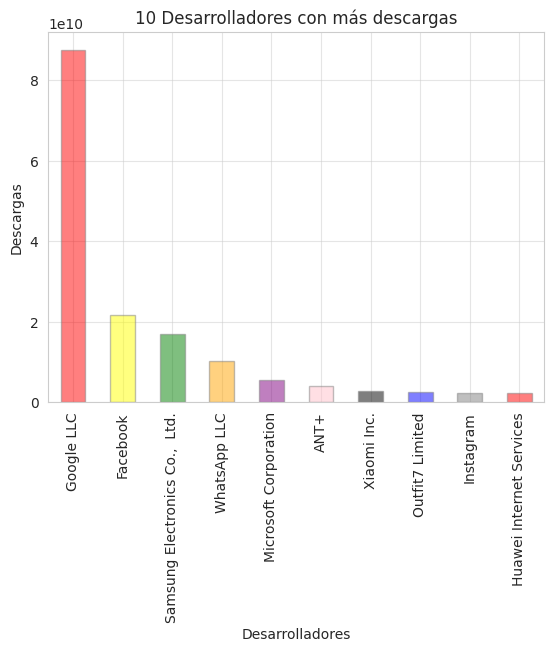

In [ ]:
#Convertimos installs en int ya que es necesario para la gráfica
df['Installs'] = df['Installs'].fillna(0).astype(int)

#Agrupar por 'Developer' y sumar las 'Installs'
descargas_desarrolladores = df.groupby('Developer')['Installs'].sum().nlargest(10)

#Crear el gráfico de barras
descargas_desarrolladores.plot(kind='bar', color=["red", "yellow", "green", "orange", "purple", "pink", "black", "blue", "grey"], alpha=0.5, edgecolor="grey")
plt.xlabel("Desarrolladores")
plt.ylabel("Descargas")
plt.xticks(rotation=90)
#Agregar cuadrícula
plt.grid(True, alpha=0.5)
plt.title("10 Desarrolladores con más descargas")
plt.savefig("10 Desarrolladores con más descargas.png")
plt.show()


**Gráfico circular de los 5 Desarrolladores con más descargas**

Este gráfico esta elaborado para ver más en detalle la comparación entre os 5 mejores desarrolladores, además de proporcionar otro punto de vista a la empresa a la hora de mostrar los gráficos.

<ipython-input-37-45b98afada60>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [descargas_desarrolladores[0], descargas_desarrolladores[1], descargas_desarrolladores[2], descargas_desarrolladores[3], descargas_desarrolladores[4]]


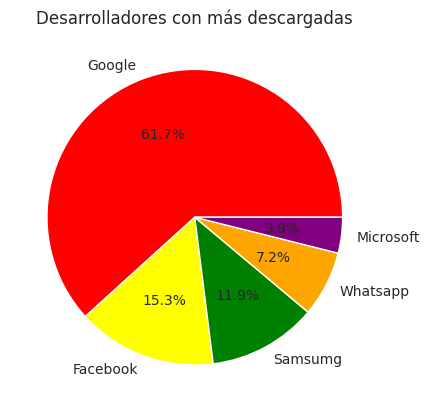

In [ ]:
#Creamos la variable de agrupación para poder realizar la gráfica
descargas_desarrolladores=df.groupby('Developer')['Installs'].sum().nlargest(5)
#Los nombres de los desarrolladores con más descargas
labels = ['Google', 'Facebook', 'Samsumg', 'Whatsapp', "Microsoft"]
#Imortamos la cantidad de desarolladores que queremos en el gráfico
sizes = [descargas_desarrolladores[0], descargas_desarrolladores[1], descargas_desarrolladores[2], descargas_desarrolladores[3], descargas_desarrolladores[4]]
#Elegimos los colores correspondientes a cada Desarrollador
colores=['red', 'yellow', 'green', 'orange', 'purple']
#Ajustamos valores de personalización de a gráfica
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
#Ponemos un titulo a la gráfica
plt.title('Desarrolladores con más descargadas')
plt.savefig("5 Desarrolladores más descargados.png")
plt.show()

**Gráfico circular de Apps de pago vs Apps gratis**

Este gráfico circular muestra la cantidad de aplicaciones que hay de pago vs las que hay gratis, los que nos ayuda a comprobar a que tipo de Apps realizar la inversión.

<ipython-input-34-7fbde1b9604c>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sizes = [conteo_tipo[0], conteo_tipo[1]]


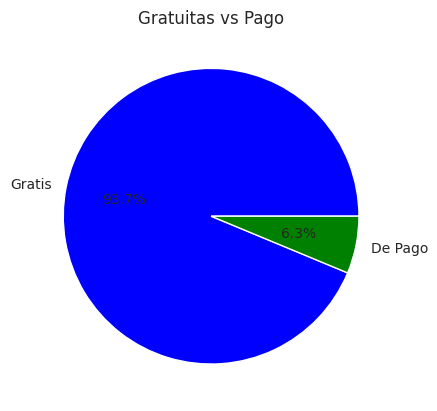

In [ ]:
#Realizamos la variable necesaria para la gráfica
conteo_tipo = df['Free'].value_counts()
#Creamos los nombres
labels = ['Gratis', 'De Pago']
#Importamos los dos tipos de datos
sizes = [conteo_tipo[0], conteo_tipo[1]]
#Ajustamos los valores de personalización y los colores
colores=['blue', 'green']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
#Creamos el título
plt.title('Gratuitas vs Pago')
plt.savefig("Apps Gratuitas vs Apps de pago.png")
plt.show()

**Gráfico de barras de las 5 Categorias más descargadas**

Este gráfico de barras complemente al gráfico de los desarrolladores más inluyetes ya que nos ayuda a indicar de manera gráfica y visual las categorías con más descargas, esto nos permite aún más personalizar nuestra campaña publicitaria y dirigirla aun más a los usuarios más específicos.

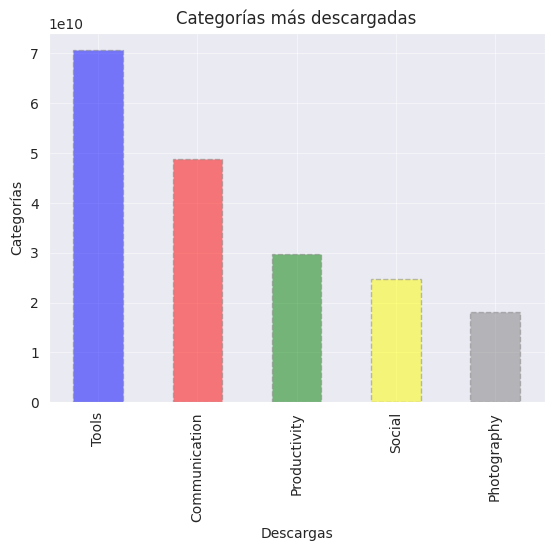

In [ ]:
agrupacion_categoria= df.groupby('Category')['Installs'].sum().nlargest(5)
# Crear el gráfico de barras editandolo y incluyendo colores
agrupacion_categoria.plot(kind='bar', color=["blue", "red", "green", "yellow", "grey", "pink", "purple", "black", "orange"], alpha=0.5, edgecolor="grey", linestyle="--")
plt.xlabel("Descargas")
plt.ylabel("Categorías")
plt.xticks(rotation=90)

#Agregar cuadrícula
plt.grid(True, alpha=0.5)
plt.title("Categorías más descargadas")
plt.savefig("Categorías más descargadas.png")
plt.show()

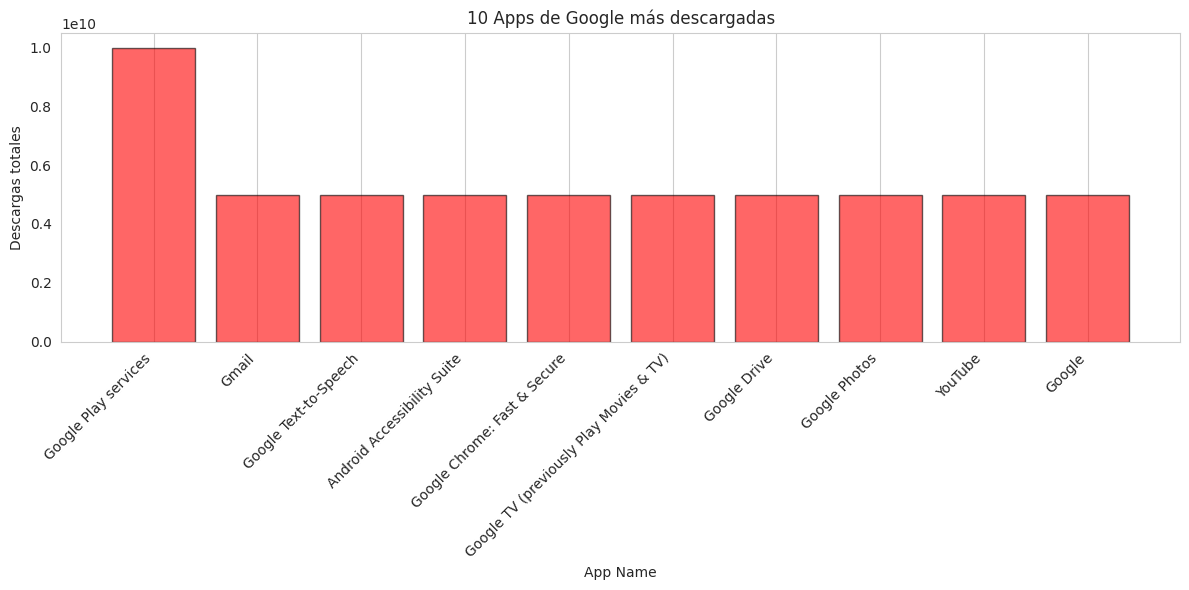

In [ ]:
import matplotlib.pyplot as plt

#Agrupar los datos por nombre de aplicación y desarrollador
genero_escuchado = df.groupby(["App Name", "Developer"])["Installs"].sum().reset_index()

#Filtrar los datos para el desarrollador
data = genero_escuchado[genero_escuchado['Developer'] == 'Google LLC']

#Seleccionar las 10 más descargadas
top_10_apps = data.sort_values(by='Installs', ascending=False).head(10)

#Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_10_apps['App Name'], top_10_apps["Installs"], color='red', edgecolor='black', alpha=0.6)
plt.xlabel('App Name')
plt.ylabel('Descargas totales')
plt.title('10 Apps de Google más descargadas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.savefig("10 Apps más descargadas de Google.png")
#Mostrar el gráfico
plt.tight_layout()
plt.show()

Grafico de las 10 apps con más descargas

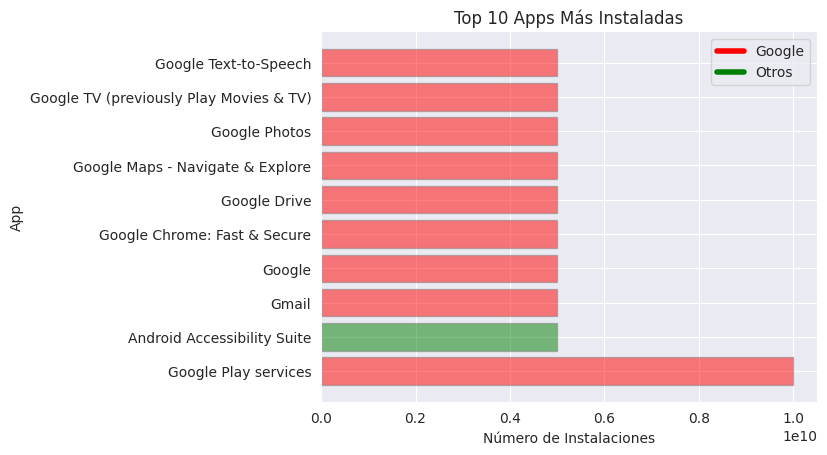

In [ ]:
#Agrupa las apps por nombre y suma las instalaciones
app_installs = data.groupby('App Name')['Installs'].sum().nlargest(10)

#Selecciona las 10 apps más instaladas
top_10_apps = app_installs.head(10)

#Crea el gráfico de barras horizontal
plt.barh(top_10_apps.index, top_10_apps.values, color=["red", "green", "red", "red", "red", "red", "red", "red", "red"], alpha=0.5, edgecolor="grey")

#Configura el título y las etiquetas de los ejes
plt.title('Top 10 Apps Más Instaladas')
plt.xlabel('Número de Instalaciones')
plt.ylabel('App')
sns.set_style("darkgrid")#Para que las lineas del grid pasen por detras de las barras
sns.despine()
legend_elements = [
    plt.Line2D([0], [0], color='red', lw=4, label='Google'),
    plt.Line2D([0], [0], color='green', lw=4, label='Otros'),]
plt.legend(handles=legend_elements, loc='upper right')
plt.savefig("10 Apps más instaladas.png")
#Muestra el gráfico
plt.show()

<ipython-input-32-1816d8325d31>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=('blue', "green", "orange","grey", "red"), edgecolor='grey')


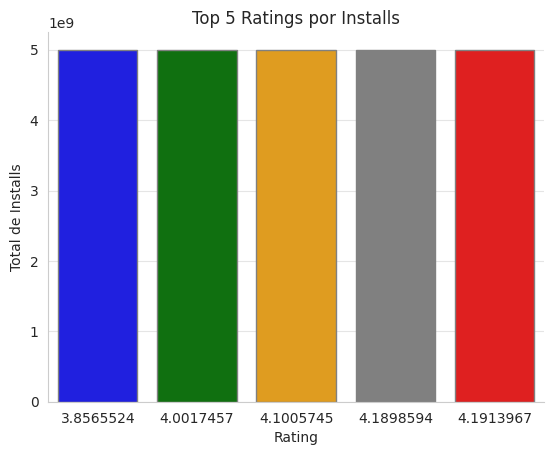

In [ ]:

data = df.groupby('Rating')['Installs'].sum().nlargest(5)
sns.barplot(x=data.index, y=data.values, palette=('blue', "green", "orange","grey", "red"), edgecolor='grey')

plt.xlabel('Rating')
plt.ylabel('Total de Installs')
plt.title('Top 5 Ratings por Installs')
sns.set_style("whitegrid")#Para que las lineas del grid pasen por detras de las barras
sns.despine()
plt.grid(axis='y', alpha=0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

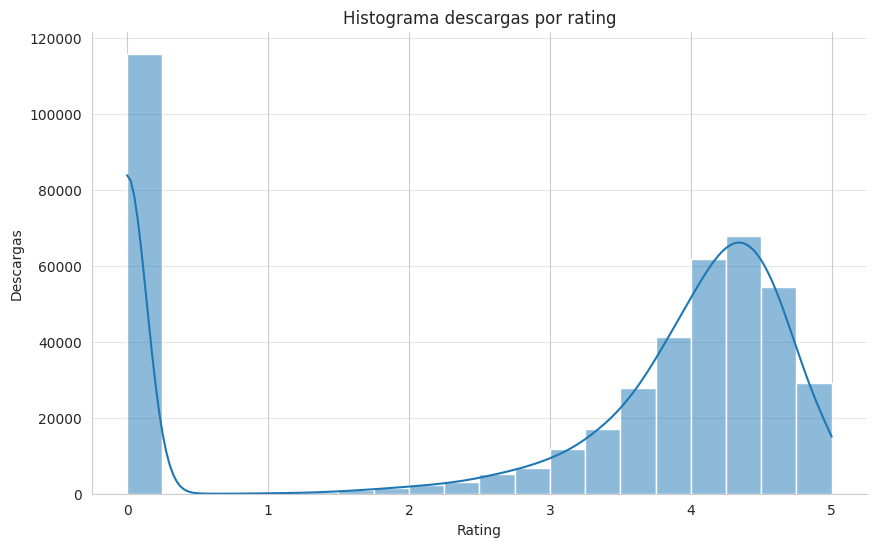

In [ ]:
plt.figure(figsize=(10, 6))
#histograma

sns.histplot(data=df, x="Rating", kde=True, bins= 20 )
sns.set_style("whitegrid")#Para que las lineas del grid pasen por detras de las barras
plt.grid(axis='y', alpha=0.5)
sns.despine()

#Etiquetas
plt.xlabel("Rating")
plt.ylabel("Descargas")
plt.title("Histograma descargas por rating")
plt.savefig("Histograma de Descargas por Rating.png")
#Mostrar
plt.show

In [ ]:
top_direcciones = df['Developer Address'].value_counts().nlargest(10)
top_direcciones

,count
Developer Address,
Desconocido,188793
India,1273
"EduGorilla Community Pvt. Ltd\n12/651, First Floor, Opposite Arvindo Park,\nIndira Nagar, Lucknow\nPin Code- 226016",743
香港,629
\n,470
Pakistan,403
"Lahore, Pakistan",375
Hyderabad,363
"201-B,Nishadham Blgd,1/5, Chipale,Panvel,Navi Mumbai-410206,Maharashtra,\nIndia",339


<ipython-input-29-c1ce9fdabc7d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_direcciones_df, x='Frecuencia', y='Developer Address', palette='Set2', edgecolor='grey')
<ipython-input-29-c1ce9fdabc7d>:14: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  plt.savefig("Frecuencia de Direcciones del Desarrollador.png")
<ipython-input-29-c1ce9fdabc7d>:14: UserWarning: Glyph 28207 (\N{CJK UNIFIED IDEOGRAPH-6E2F}) missing from current font.
  plt.savefig("Frecuencia de Direcciones del Desarrollador.png")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39321 (\N{CJK UNIFIED IDEOGRAPH-9999}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28207 (\

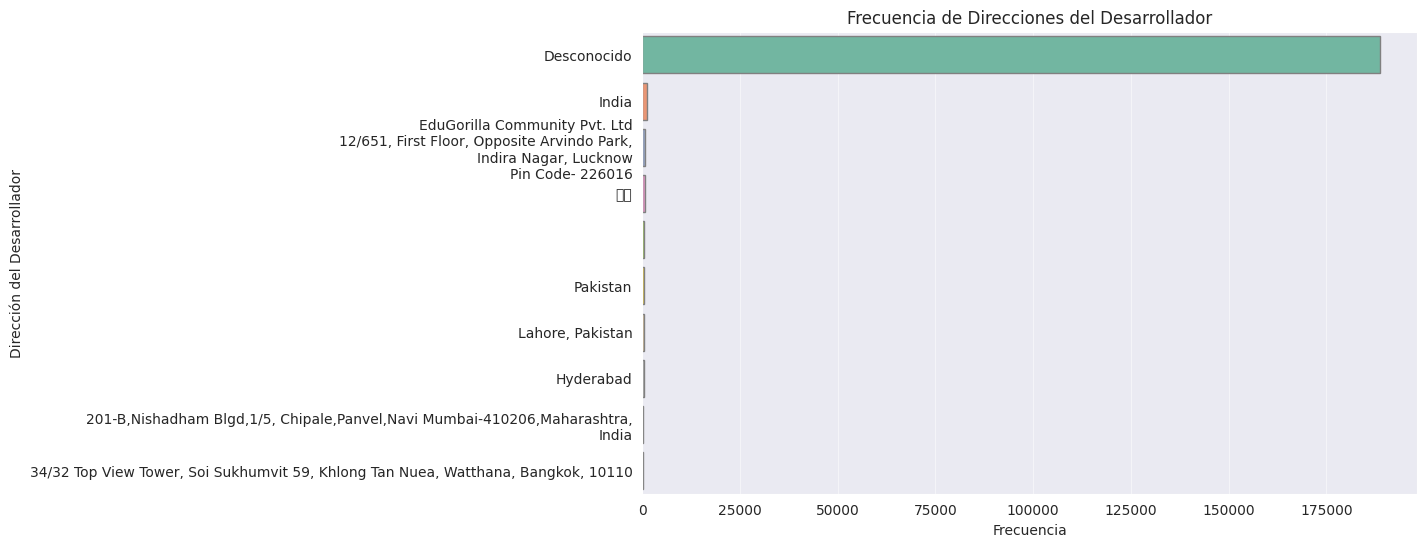

In [ ]:
top_direcciones = df['Developer Address'].value_counts().nlargest(10)

top_direcciones_df = top_direcciones.reset_index()
top_direcciones_df.columns = ['Developer Address', 'Frecuencia']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_direcciones_df, x='Frecuencia', y='Developer Address', palette='Set2', edgecolor='grey')

plt.xlabel("Frecuencia")
plt.ylabel("Dirección del Desarrollador")
plt.title("Frecuencia de Direcciones del Desarrollador")
sns.set_style("whitegrid")  # Para que las líneas del grid pasen por detrás de las barras
plt.grid(axis='x', alpha=0.5)
plt.savefig("Frecuencia de Direcciones del Desarrollador.png")
plt.show()


**Gráfico con las medias por ratings**

A la hora de hacer el gráfico con las medias de descargas de las apps con respecto a sus ratings y realizar la gráfica nos daba problemas por el tipo de número y por lo tanto realizamos un dataframe aparte del original para poder importarlo de manera sencilla a la gráfica.

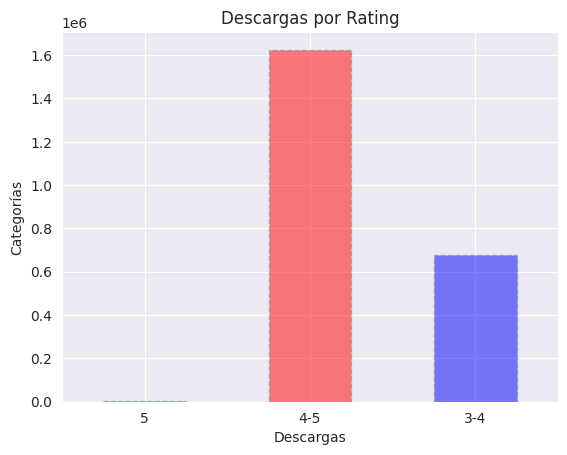

In [ ]:
#Realizamos las medias
media_descargas_5 = df.loc[df['Rating'] == 5, 'Installs'].mean()
media_descargas_4= df.loc[(df['Rating'] > 4) & (df['Rating'] < 5), 'Installs'].mean()
media_descargas_3= df.loc[(df['Rating'] > 3) & (df['Rating'] < 4), 'Installs'].mean()

#Creamos un nuevo dataframe para poder hacer el grafico
data = pd.DataFrame({
    'Rating': ['5', '4-5', '3-4'],
    'Media_Descargas': [media_descargas_5, media_descargas_4, media_descargas_3]
})

data.plot(x='Rating', y='Media_Descargas', kind='bar', color=["green", "red", "blue"], alpha=0.5, edgecolor="grey", linestyle="--", legend= False)

plt.xlabel("Descargas")
plt.ylabel("Categorías")
plt.xticks(rotation=0)
#Agregar cuadrícula
sns.set_style("darkgrid")

plt.title("Descargas por Rating")
plt.savefig("Descargas por Rating.png")
plt.show()

**Grafica de Edad y descargas**

Para esta gráfica optamos por utilizar Power Bi a que el código producía errores y mediante Power Bi aprovechando la base de datos hemos realizado el último gráfico.

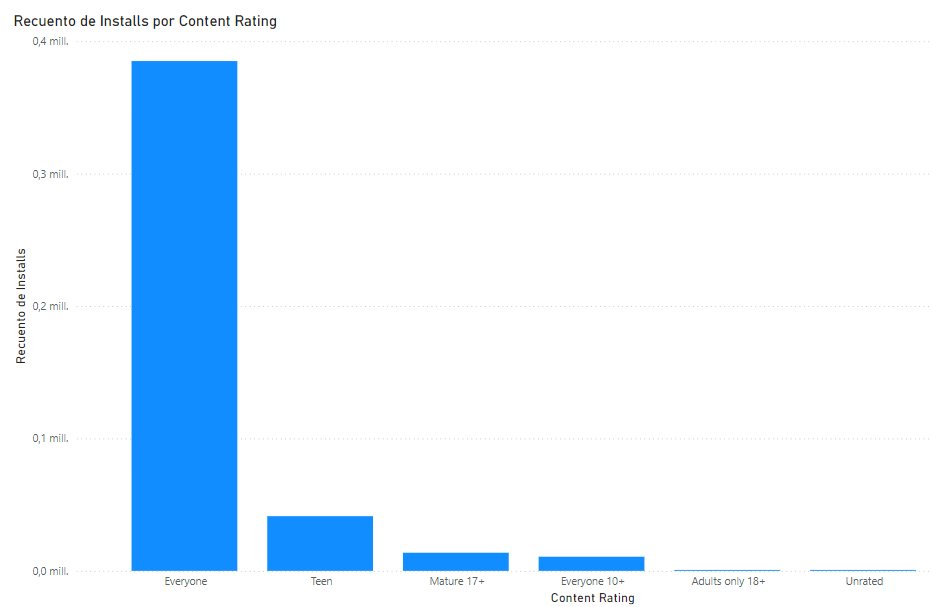

**Gráfica Rating por Categoría**

Al igual que el gráfico anterior, hemos aprovechado Power Bi para realizar este gráfico ya que lo hemos personalizado demanera visual para que sea más fácil su comprension.

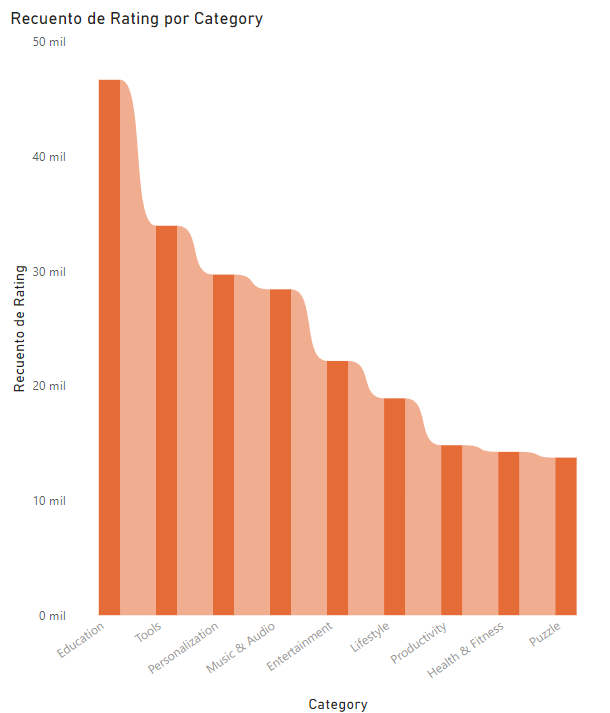